In [47]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [84]:
 #Data Reading
 df = pd.read_csv(r"C:\Users\USER\Downloads\shopping_behavior.csv")
 df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [3]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Discount Applied           object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
for i in df.columns:
    print(i,':','\n',df[i].unique())

Customer ID : 
 [   1    2    3 ... 3898 3899 3900]
Age : 
 [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
Gender : 
 ['Male' 'Female']
Item Purchased : 
 ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
Category : 
 ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Purchase Amount (USD) : 
 [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]
Location : 
 ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'


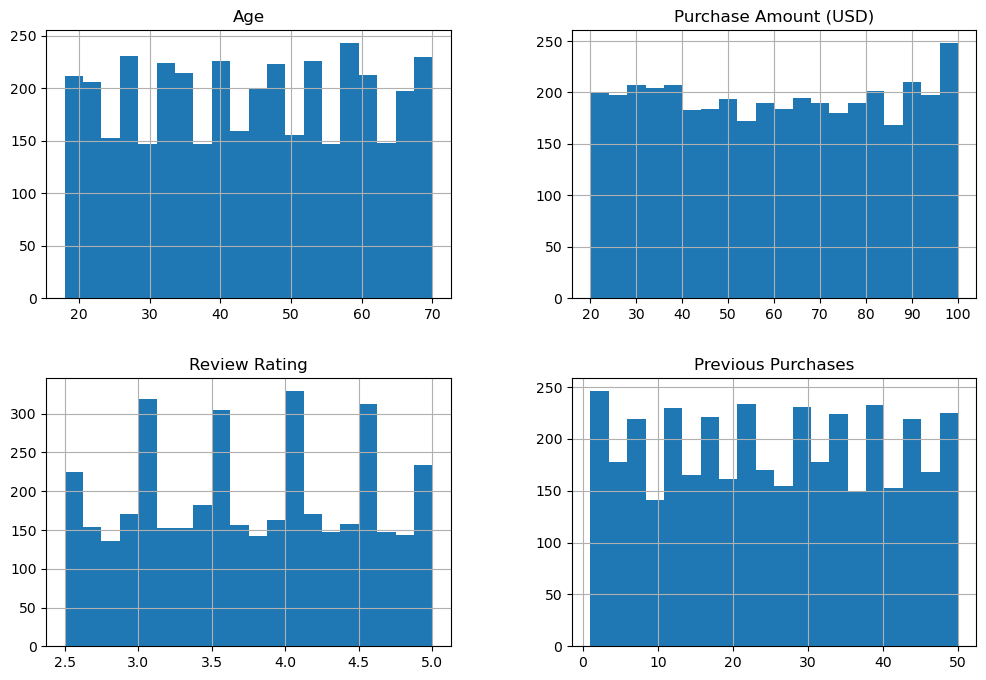

In [8]:
numeric_cols = ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']

df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.show()

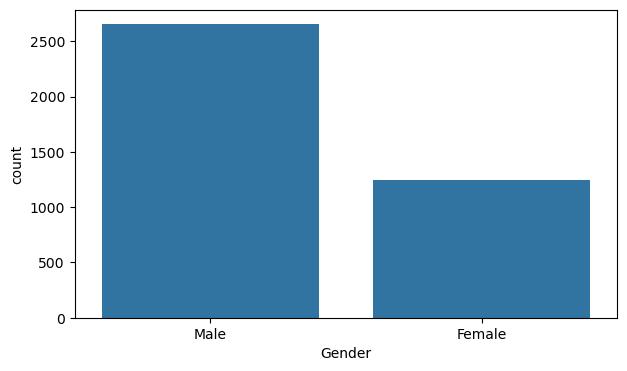

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Gender')
plt.show()

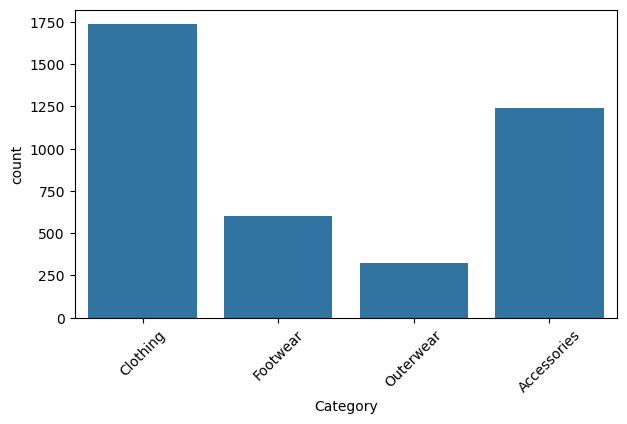

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.show()

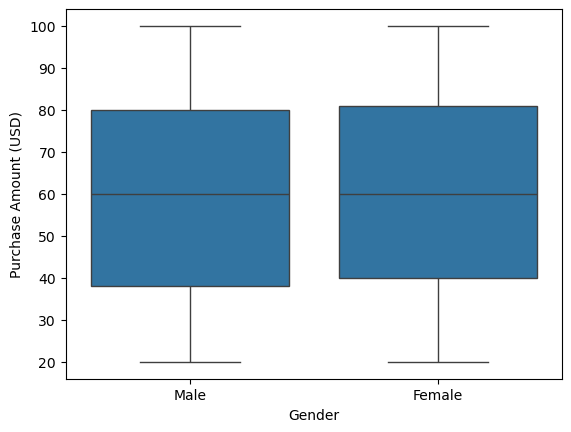

In [11]:
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.show()

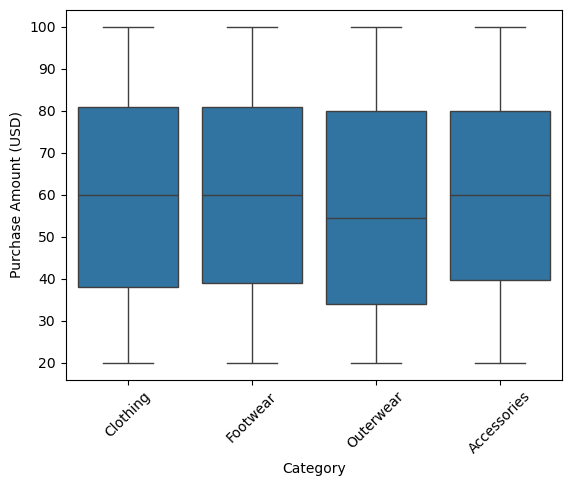

In [12]:
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

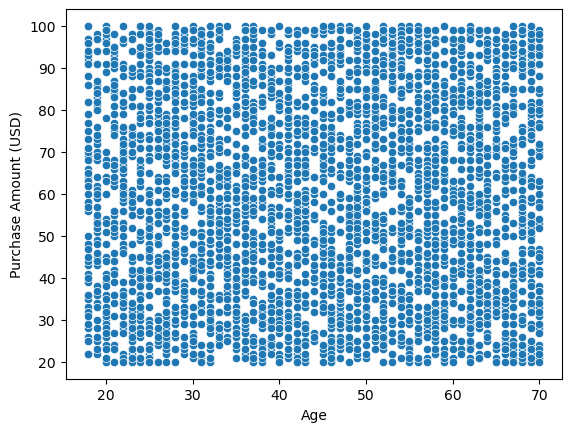

In [13]:
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)')
plt.show()

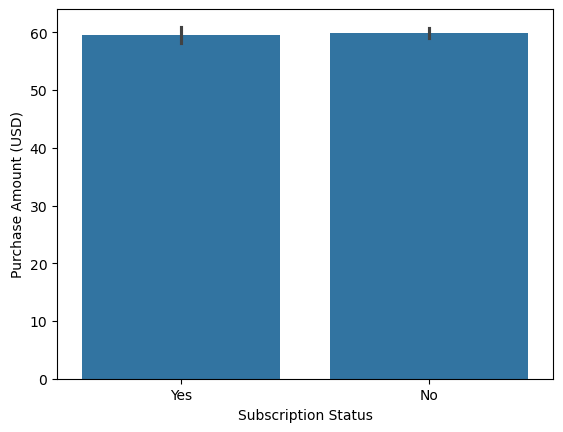

In [14]:
sns.barplot(data=df, x='Subscription Status', y='Purchase Amount (USD)')
plt.show()

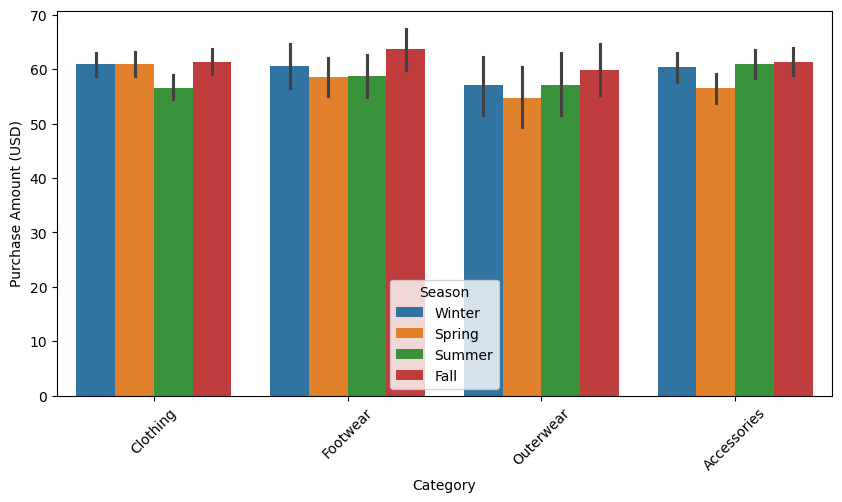

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', hue='Season')
plt.xticks(rotation=45)
plt.show()

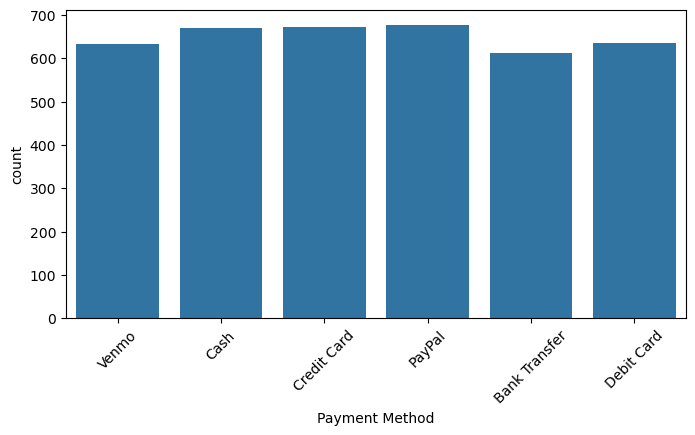

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Payment Method')
plt.xticks(rotation=45)
plt.show()

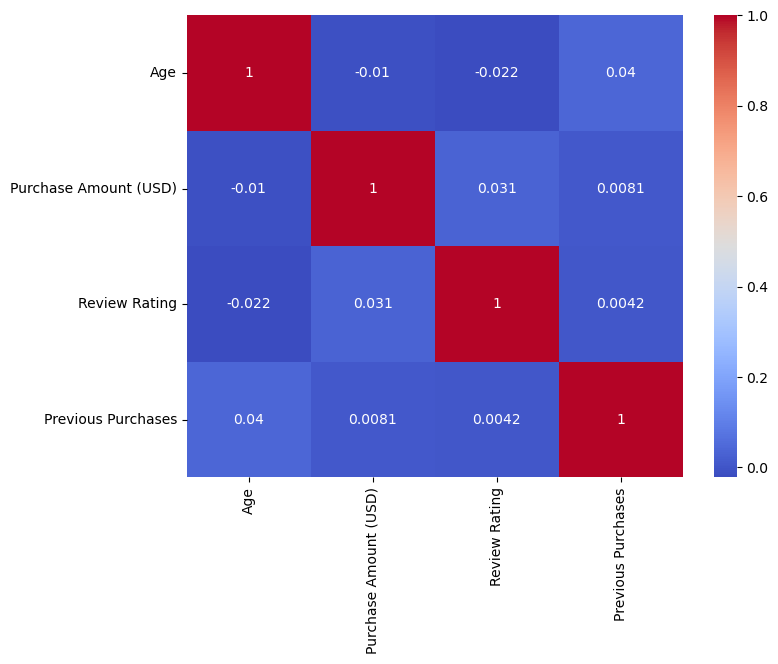

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

In [19]:
outliers = df[(df['Purchase Amount (USD)'] < (Q1 - 1.5*IQR)) | 
              (df['Purchase Amount (USD)'] > (Q3 + 1.5*IQR))]

In [20]:
print("Outliers found:", len(outliers))

Outliers found: 0


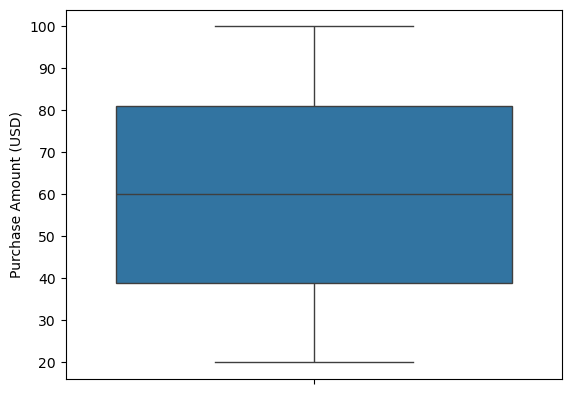

In [21]:
sns.boxplot(df['Purchase Amount (USD)'])
plt.show()

In [22]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Discount Applied           object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [85]:
df["Subscription Status"] = df["Subscription Status"].map({"Yes":1, "No":0})
df["Discount Applied"] = df["Discount Applied"].map({"Yes":1, "No":0})

In [86]:
order = {
    "Daily": 5,
    "Weekly": 4,
    "Fortnightly": 3,
    "Monthly": 2,
    "Annually": 1
}

df["Frequency of Purchases"] = df["Frequency of Purchases"].map(order)

In [87]:
df = pd.get_dummies(df, 
    columns=[
        "Gender", "Item Purchased", "Category", "Location", 
        "Size", "Color", "Season", "Payment Method"
    ], 
    drop_first=True)

In [68]:
df.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases,Gender_Male,Item Purchased_Belt,...,Color_White,Color_Yellow,Season_Spring,Season_Summer,Season_Winter,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,1,55,53,3.1,1,1,14,3.0,True,False,...,False,False,False,False,True,False,False,False,False,True
1,2,19,64,3.1,1,1,2,3.0,True,False,...,False,False,False,False,True,True,False,False,False,False
2,3,50,73,3.1,1,1,23,4.0,True,False,...,False,False,True,False,False,False,True,False,False,False
3,4,21,90,3.5,1,1,49,4.0,True,False,...,False,False,True,False,False,False,False,False,True,False
4,5,45,49,2.7,1,1,31,1.0,True,False,...,False,False,True,False,False,False,False,False,True,False


In [69]:
df.dtypes

Customer ID                     int64
Age                             int64
Purchase Amount (USD)           int64
Review Rating                 float64
Subscription Status             int64
                               ...   
Payment Method_Cash              bool
Payment Method_Credit Card       bool
Payment Method_Debit Card        bool
Payment Method_PayPal            bool
Payment Method_Venmo             bool
Length: 120, dtype: object

In [88]:
ip = df.drop("Purchase Amount (USD)", axis=1)
op = df["Purchase Amount (USD)"]

In [71]:
ip.head()

,Customer ID,Age,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,...,Color_White,Color_Yellow,Season_Spring,Season_Summer,Season_Winter,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,1,55,3.1,1,1,14,3.0,True,False,True,...,False,False,False,False,True,False,False,False,False,True
1,2,19,3.1,1,1,2,3.0,True,False,False,...,False,False,False,False,True,True,False,False,False,False
2,3,50,3.1,1,1,23,4.0,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,4,21,3.5,1,1,49,4.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,5,45,2.7,1,1,31,1.0,True,False,True,...,False,False,True,False,False,False,False,False,True,False


In [56]:
op.head()

0    53
1    64
2    73
3    90
4    49
Name: Purchase Amount (USD), dtype: int64

In [89]:
 #Train test split
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [90]:
from sklearn.preprocessing import StandardScaler

features = [
    "Age", "Purchase Amount (USD)", "Previous Purchases",
    "Frequency of Purchases", "Review Rating",
    "Discount Applied", "Subscription Status"
]

X = df[features]

In [91]:
# Step 2: Ensure no NaN
X = X.replace(["", " ", None], np.nan)
X = X.fillna(X.median())

In [92]:
# Step 3: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
# Step 4: Find best K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(f"k={k}, silhouette = {silhouette_score(X_scaled, labels)}")

k=2, silhouette = 0.21858405706229103
k=3, silhouette = 0.16529686613276698
k=4, silhouette = 0.15090897096072442
k=5, silhouette = 0.15269213628565892
k=6, silhouette = 0.13591362174034663
k=7, silhouette = 0.1420577635587838
k=8, silhouette = 0.13994249037558118
k=9, silhouette = 0.14540613133746208
k=10, silhouette = 0.15572614048204012


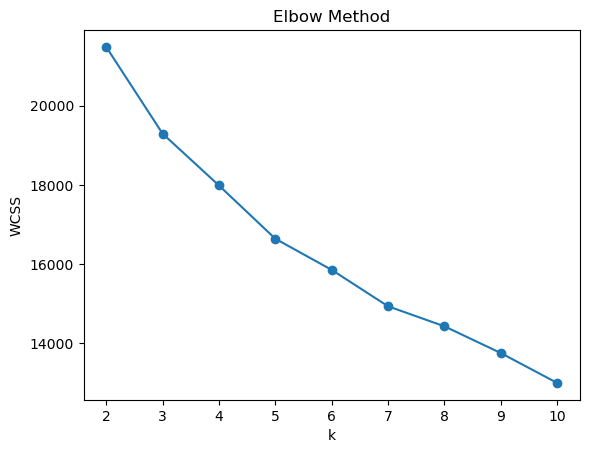

In [94]:
from sklearn.cluster import KMeans

wcss = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(K, wcss, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [95]:
final_model = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = final_model.fit_predict(X_scaled)

df["Cluster"].value_counts()

Cluster
1    2223
0    1677
Name: count, dtype: int64

In [96]:
df.groupby("Cluster")[features].mean()

,Age,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating,Discount Applied,Subscription Status
Cluster,,,,,,,
0,44.144902,59.279070,25.742993,2.496849,3.739654,1.0,0.627907
1,44.010796,60.130454,25.056230,2.458533,3.757715,0.0,0.000000


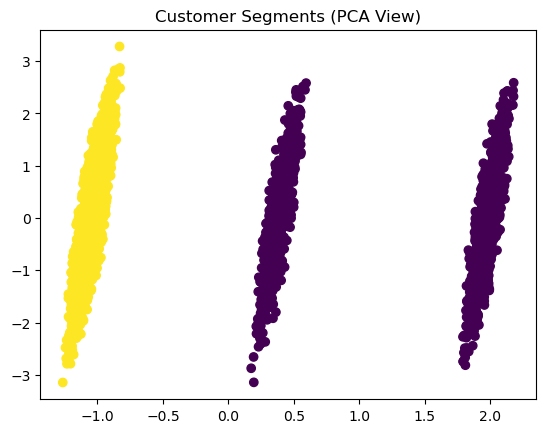

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"])
plt.title("Customer Segments (PCA View)")
plt.show()

In [98]:
import joblib

In [99]:
joblib.dump(final_model, "customer_segmentation_kmeans.pkl")

['customer_segmentation_kmeans.pkl']

In [100]:
joblib.dump(scaler, "customer_segmentation_kmeans_scaler.pkl")

['customer_segmentation_kmeans_scaler.pkl']